## Capstone Project_1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
import seaborn as sns

from IPython import display
from ipywidgets import interact, widgets

%config InlineBackend.figure_format = 'retina'

# Setup Seaborn
sns.set_style("darkgrid")
sns.set_context("poster",font_scale=0.7,rc={"lines.linewidth": 1})
sns.set_color_codes(palette='muted')

In [2]:
data = pd.read_csv('Data/Train_Loan_Home.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
def most_common(col):
    most_cmn=pd.get_dummies(col).sum().sort_values(ascending = False).index[0]
    return most_cmn

In [6]:
def replace_missing(col):
    most_cmn = most_common(col)
    for i in range(len(col)):
        if pd.isnull(col[i]):
            col[i] = most_cmn
            inplace=True
        

In [7]:
replace_missing(data.Gender)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
replace_missing(data.Married)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
replace_missing(data.Self_Employed)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
replace_missing(data.Dependents)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
data['Dependents'].replace('3+','3' ,inplace=True)

In [12]:
data.LoanAmount[data.LoanAmount.isnull()] = data.LoanAmount.mean()

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
replace_missing(data.Credit_History)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
replace_missing(data.Loan_Amount_Term)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [16]:
data["Total_Income"] = data["ApplicantIncome"]+data["CoapplicantIncome"]

By considering the above link, I have found that on an average it would be around 8.5% to 9.5%. Hence for safe-side I am assuming that 9% is the interest rate.

A = P * R * (1+R)^N

B = (1+R)^(N-1)

EMI = A/B.

In [17]:
data["EMI"] = (data["LoanAmount"]*0.09*(1.09**data["Loan_Amount_Term"]))/(1.09**(data["Loan_Amount_Term"]-1))

In [18]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,14.363033
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,12.556800
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,6.474600
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,11.772000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,13.832100


In [19]:
def feature__countplot(col):
    plt.figure(figsize=(6, 4))
    data[col].value_counts().plot(kind='bar',color=('b','darkorange'))
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.title("Homeloan_"+col+"Status")
    plt.savefig("Graphs/Homeloan_"+col+"Status.jpeg",bbox_inches = 'tight')
    plt.show()

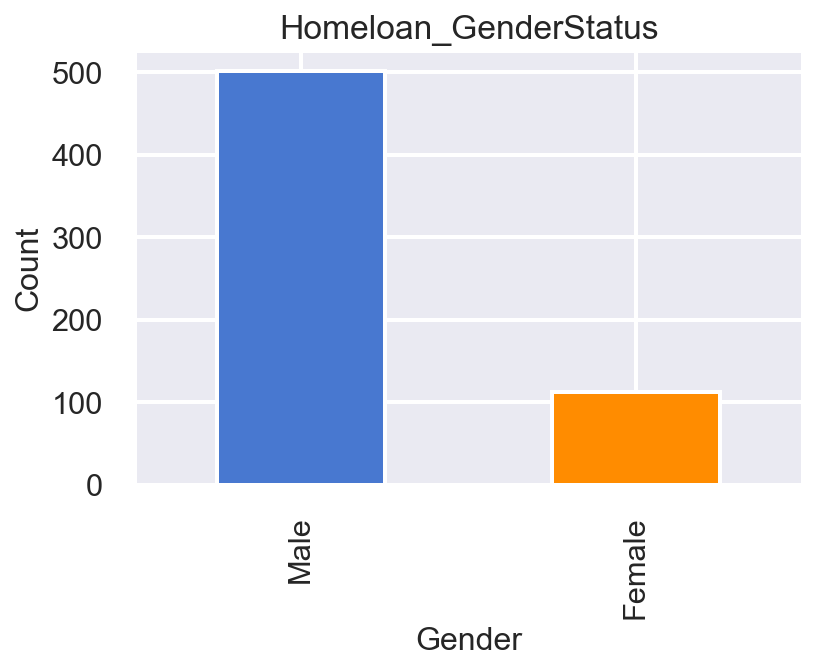

In [20]:
feature__countplot("Gender")

#### Gender Column:

According to our analysis, Gender may influence home loan approval. As we can conclude that, mortgage lenders were more inclined towards men than women expecting men to be the lead borrowers on single applications.

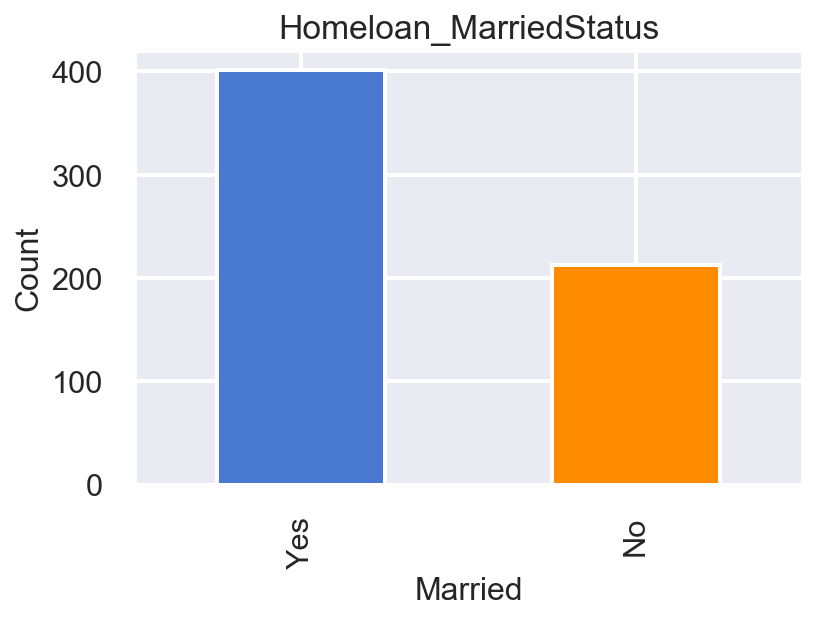

In [21]:
feature__countplot("Married")

#### Marital Status:

From the above results, we can conclude that most of the home loans were approved to married couples compared to persons who are single or with no relationship.

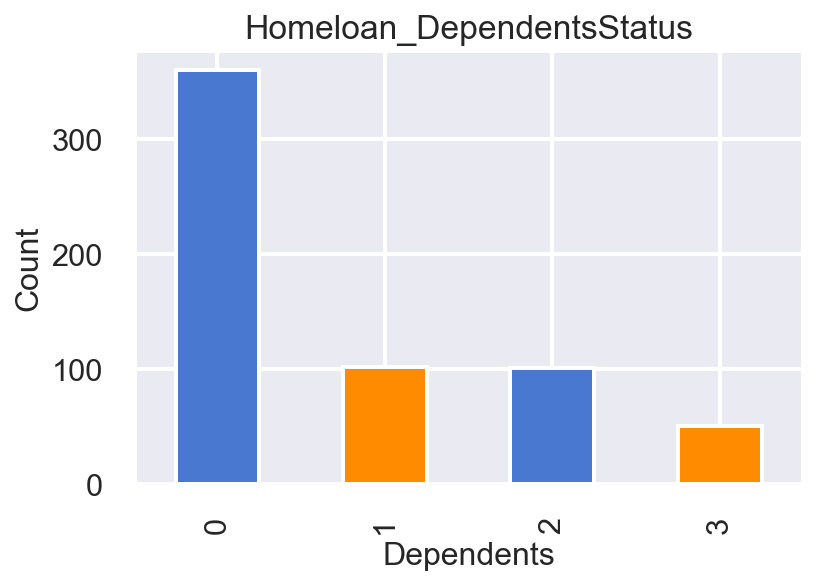

In [22]:
feature__countplot("Dependents")

#### Dependents: 

From the analysis, we can conclude that the number of dependents may automatically affected the approvals of home loans. There is a higher chance of getting home loan approval for applicants who have less number of dependents or no dependents.

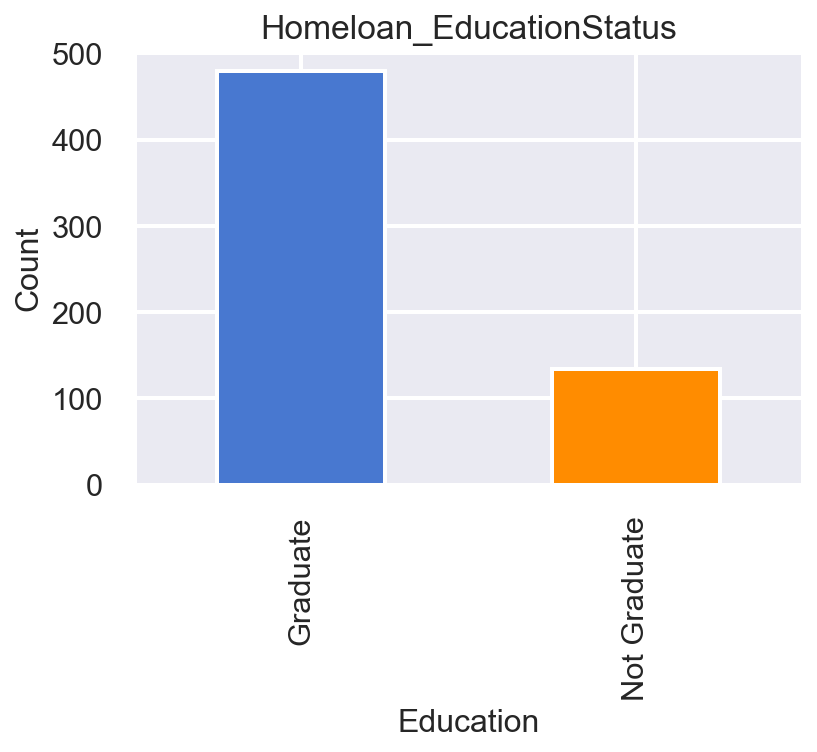

In [23]:
feature__countplot("Education")

#### Education:

From the analysis, we can conclude that the educational status may automatically affected the approvals of home loans. There is a higher chance of getting home loan approval for applicants who are graduates.

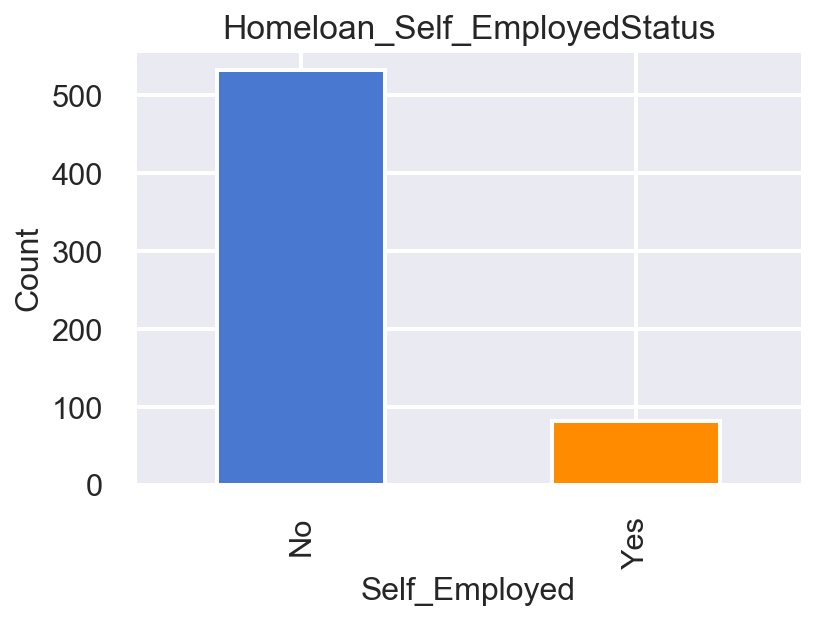

In [24]:
feature__countplot("Self_Employed")

#### Employment:

From the analysis, we can conclude that the employment status may automatically affected the approvals of home loans. There is a higher chance of getting home loan approval for applicants who are self_employed.

In [25]:
def feature_comp_plot(col1,col2):
    
    fig, ax = plt.subplots(figsize=(6,4)) 
    
    x2 = data.groupby([col1,col2])['Loan_ID'].count()
    x2 = x2.reset_index()
    
    stats = x2[col2].drop_duplicates()
    margin_bottom = np.zeros(len(x2[col1].drop_duplicates()))
    colors = ["#006D2C", "#31A354","#74C476"]
    
    for num, status in enumerate(stats):
        values = list(x2[x2[col2] == status].loc[:, 'Loan_ID'])
        x2[x2[col2] == status].plot.bar(x=col1,y='Loan_ID', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=status)
        margin_bottom += values
    ax.set_title(col1+" vs. "+col2)
    plt.savefig("Graphs/"+col1+" vs. "+col2+".jpeg",bbox_inches = 'tight')
    plt.show()
    

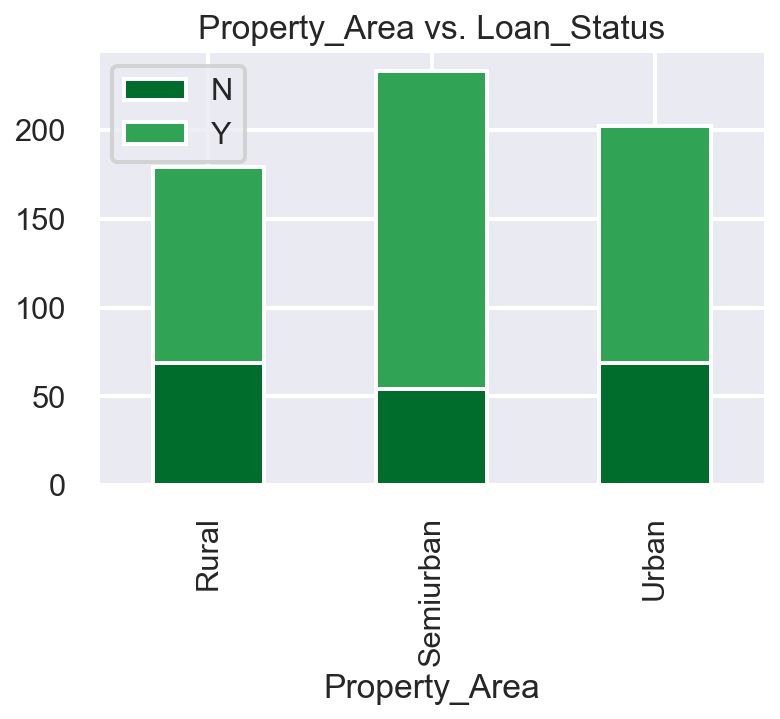

In [26]:
feature_comp_plot("Property_Area","Loan_Status")

#### Relationship between Property area and loan status:

From the above results we can infer that, the higher percentage of loan approval is for semi-urban houses followed by urban and rural houses.

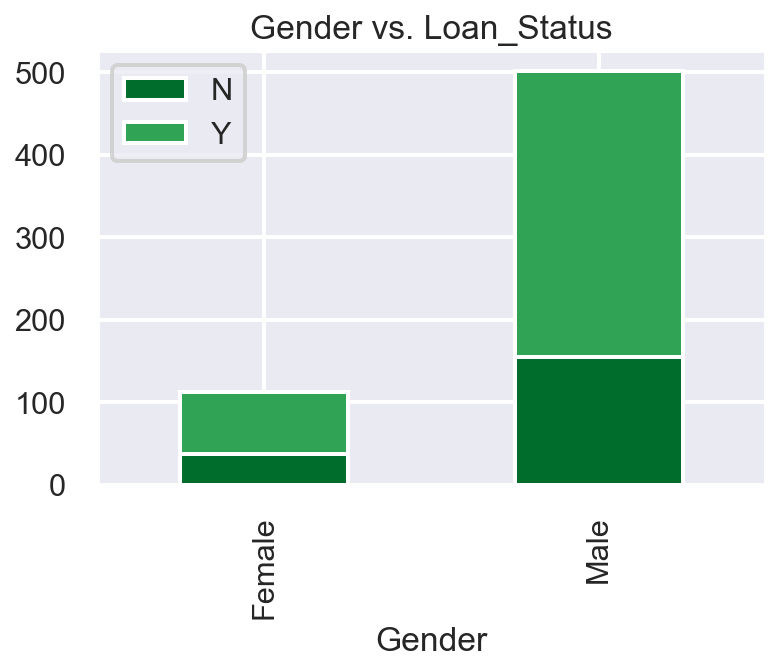

In [27]:
feature_comp_plot("Gender","Loan_Status")

#### Relationship between Gender and Loan status:

From the data analysis, we can conclude that male gender as primary applicants have higher percentage of loan approval than female as primary applicants.

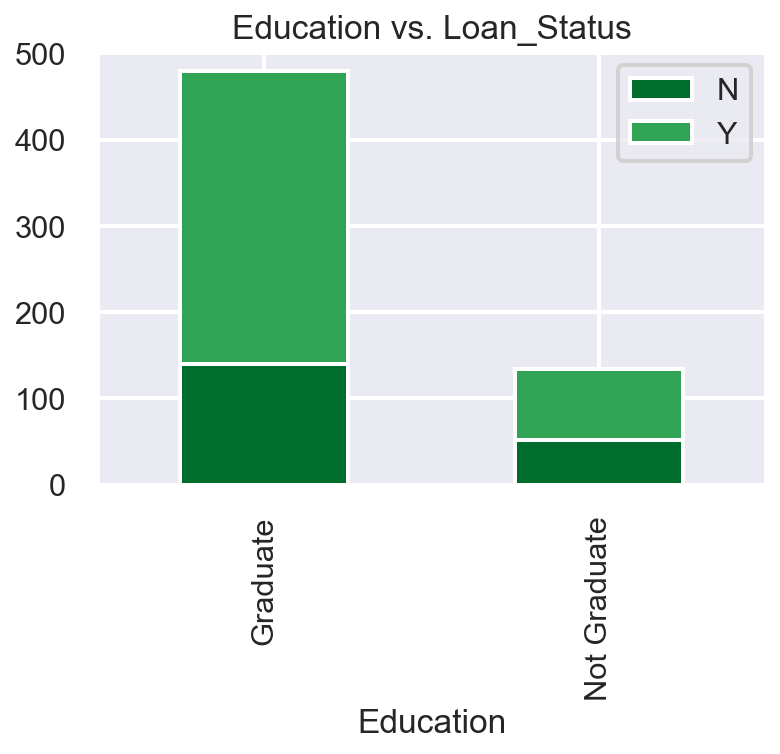

In [28]:
feature_comp_plot("Education","Loan_Status")

#### Relationship between education vs Loan status: 

From the analysis, we can conclude that the applicants who are graduate were in higher percentage of loan approval than non-graduate applicants.

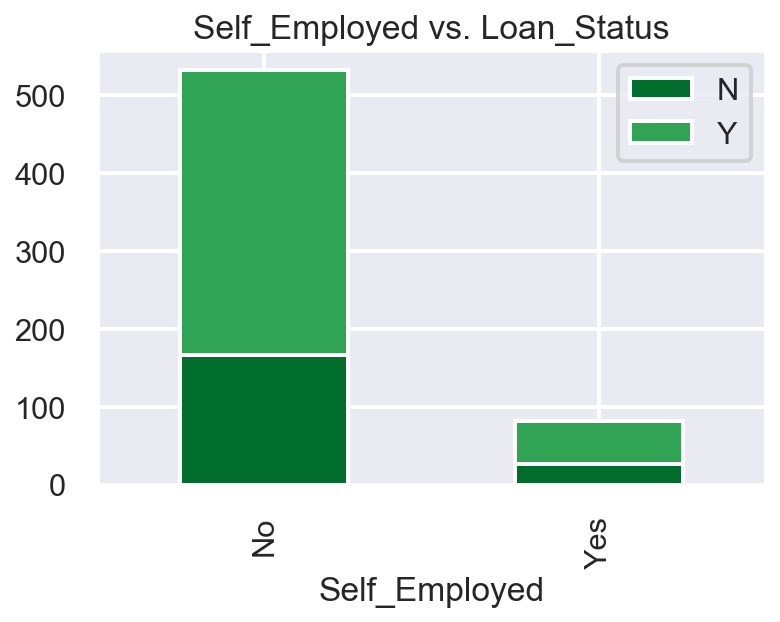

In [29]:
feature_comp_plot("Self_Employed","Loan_Status")

#### Relationship between Self-Employed vs Loan_Status: 

From the data analysis, we can conclude that home-ownership rates for self-employed households were more declined than for salaried households.

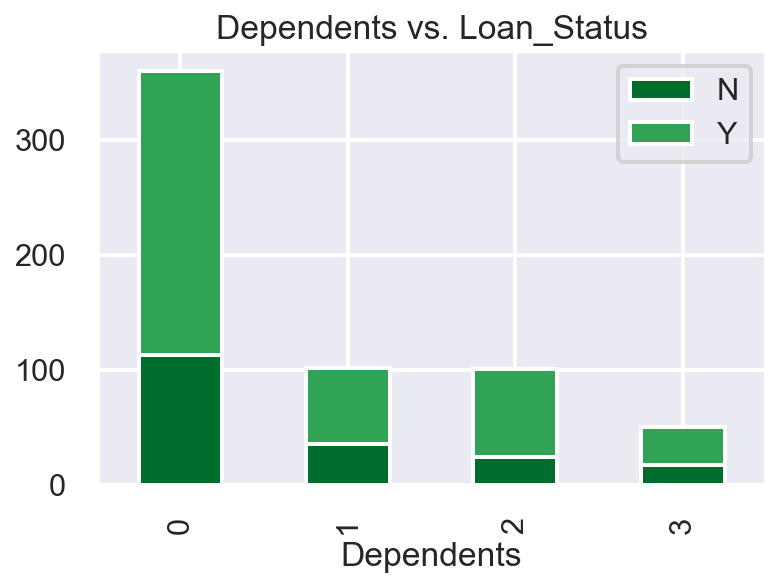

In [30]:
feature_comp_plot("Dependents","Loan_Status")

#### Relationship between Dependents vs Loan status: 

From the analysis, we can conclude that the number of dependents may automatically affected the approvals of home loans. There is a higher chance of getting home loan approval for applicants who have less number of dependents or no dependents.

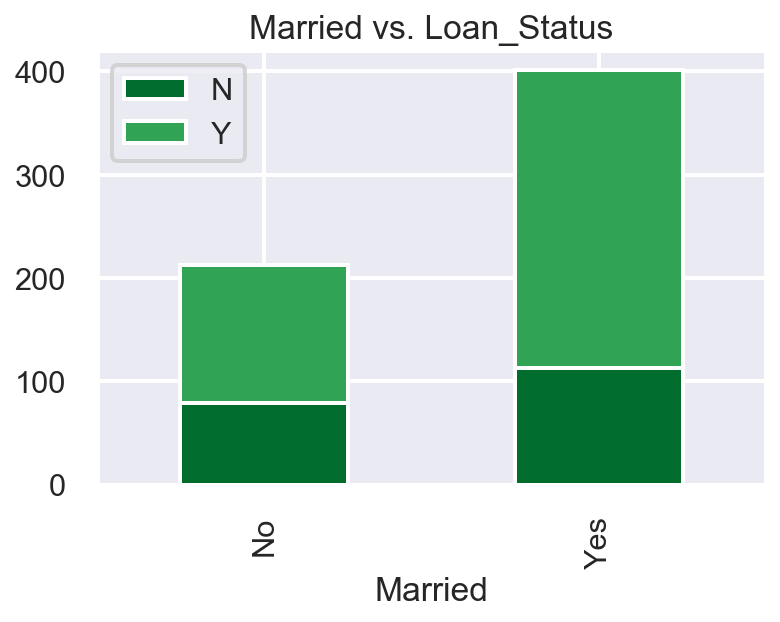

In [31]:
feature_comp_plot("Married","Loan_Status")

#### Relationship between Marital status vs Loan status: 

From the analysis, we can conclude that the highest number of customers are married who were eligible for the home loan approval than single customers.

### Machine Learning Algorithms: 

Converting the categorical variables into numerical values using map function

In [32]:
data.Education=data.Education.map({'Not Graduate':0,'Graduate':1})

In [33]:
data.Property_Area=data.Property_Area.map({'Rural':0,'Semiurban':1,'Urban':2})

In [34]:
data.Loan_Status=data.Loan_Status.map({'N':0,'Y':1})

In [35]:
data.Self_Employed=data.Self_Employed.map({'No':0,'Yes':1})

In [36]:
data.Married=data.Married.map({'No':0,'Yes':1})

In [37]:
data.Gender=data.Gender.map({'Female':0,'Male':1})

In [38]:
data.drop(['Loan_ID'], axis=1, inplace=True)

In [39]:
X = data.drop(['Loan_Status'], axis=1)
y = data["Loan_Status"]

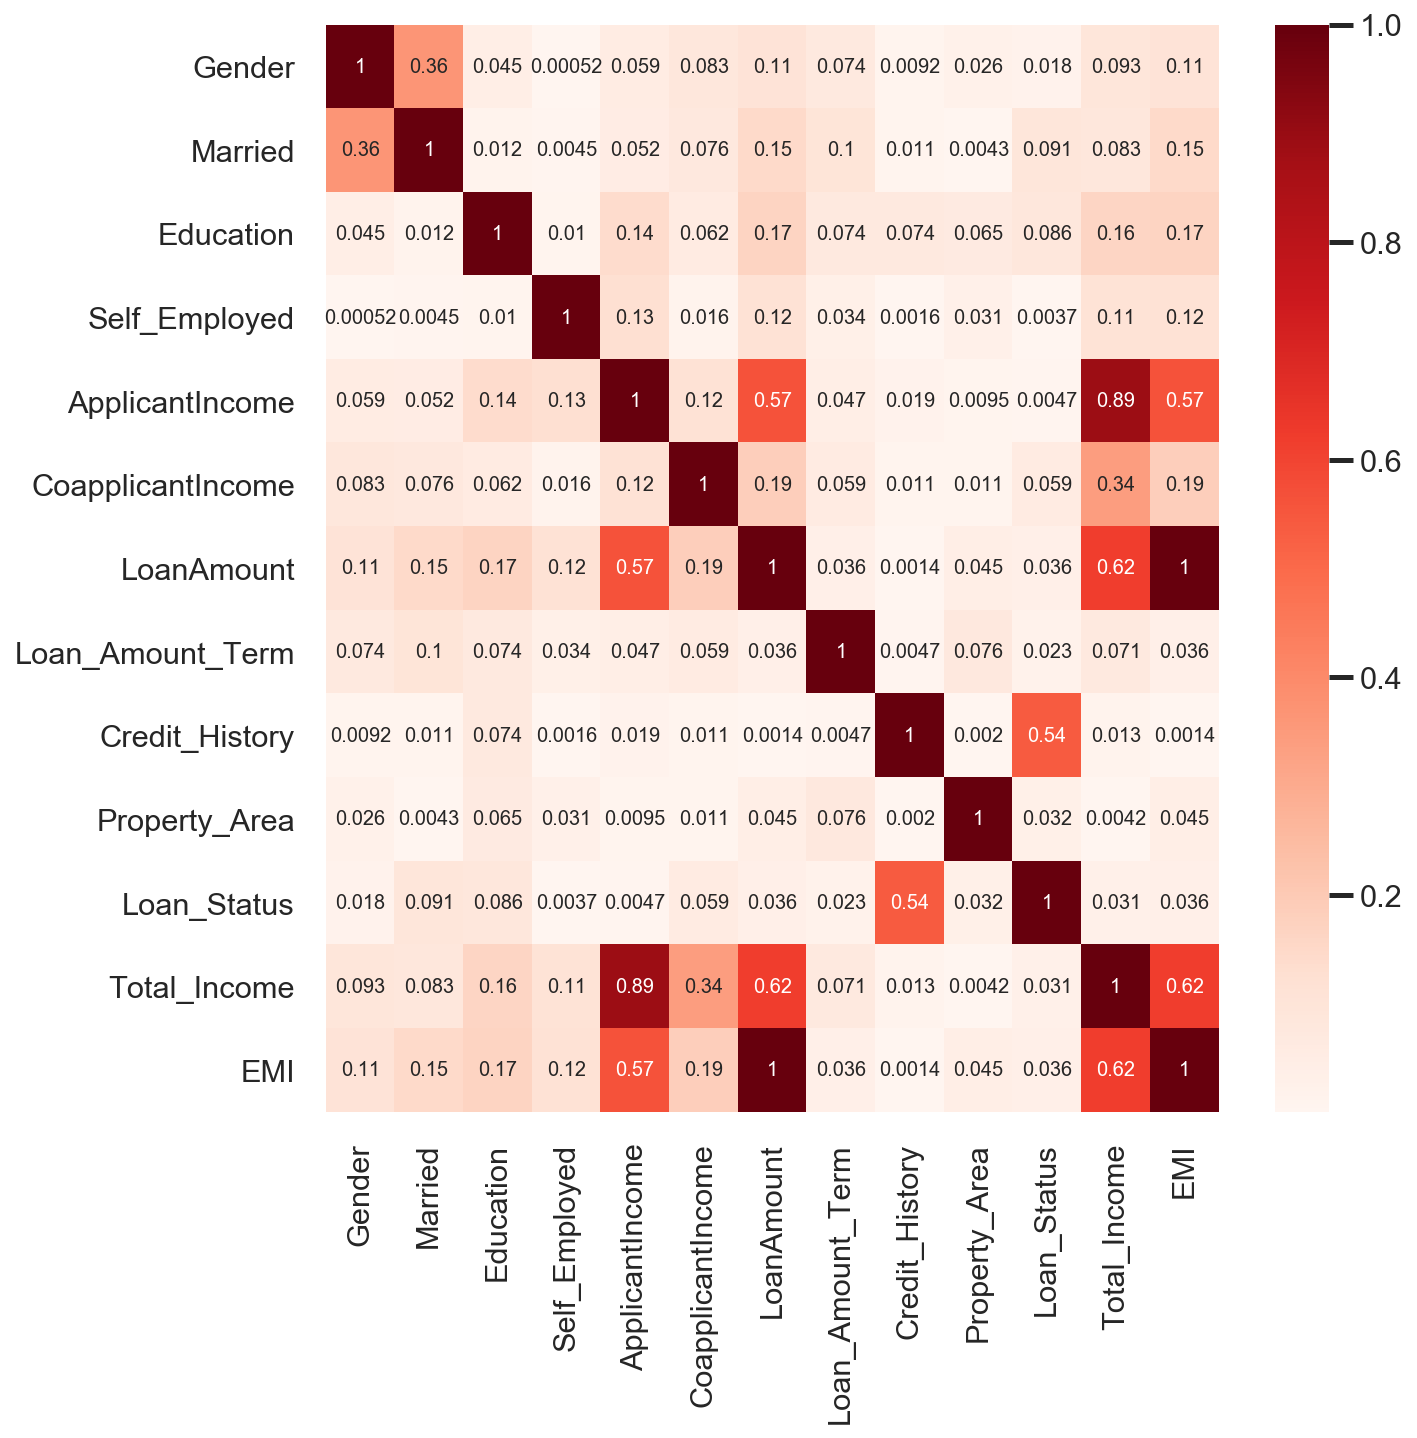

In [40]:
plt.figure(figsize=(10,10))
import math
cor = abs(data.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("Graphs/correlation_graph.jpeg",bbox_inches = 'tight')
plt.show()

In [41]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

In [42]:
#split train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

In [43]:
#import classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test) #classifier performance on test set

C:\Users\satmi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8376623376623377

In [44]:
# importing performance measuring tools
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score,classification_report

recall_score(y_test,y_pred,average='macro')

0.7235491305258747

In [45]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



In [46]:
confusion_matrix(y_test,y_pred)

array([[ 20,  23],
       [  2, 109]], dtype=int64)

In [47]:
accuracy_score(y_test,y_pred)

0.8376623376623377

In [48]:
precision_score(y_test,y_pred,average='macro')

0.8674242424242424

In [49]:
from sklearn.metrics import roc_curve

def roc_generator(model,title):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC_"+title)
    plt.savefig("Graphs/ROC_"+title,bbox_inches = 'tight')
    plt.show()

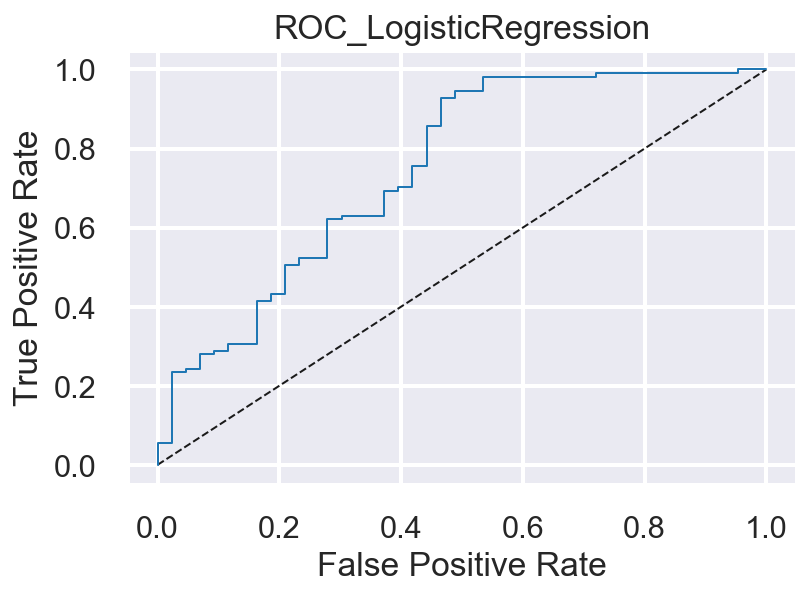

In [50]:
roc_generator(classifier,"LogisticRegression")

In [51]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=21,weights='distance',p=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8116883116883117

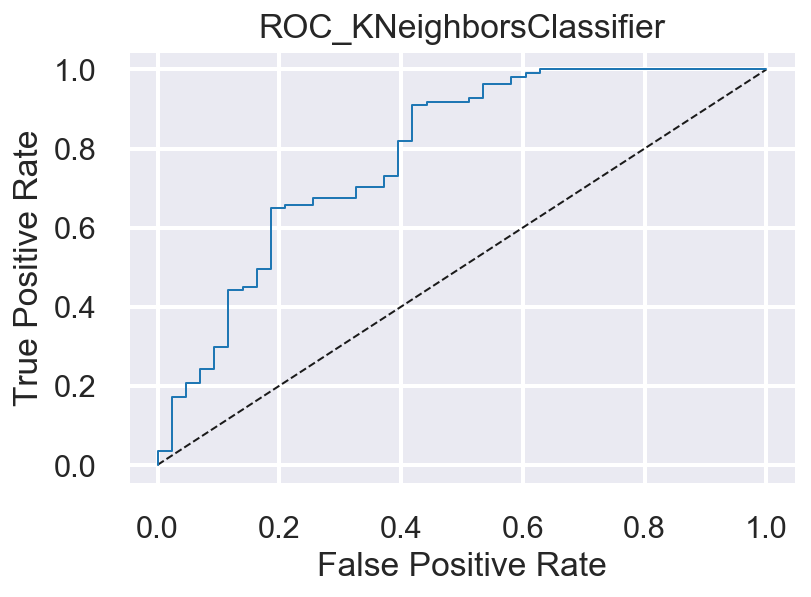

In [52]:
roc_generator(model,"KNeighborsClassifier")

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)
param_dict=({'n_neighbors':range(3,11,2),'weights':['uniform','distance'],'p':[1,2,3,4,5]})
from sklearn.model_selection import GridSearchCV
best_model=GridSearchCV(model,param_dict,cv=5)
best_model.fit(X_scaled,y)
best_model.best_params_
best_model.best_score_

0.7964169381107492

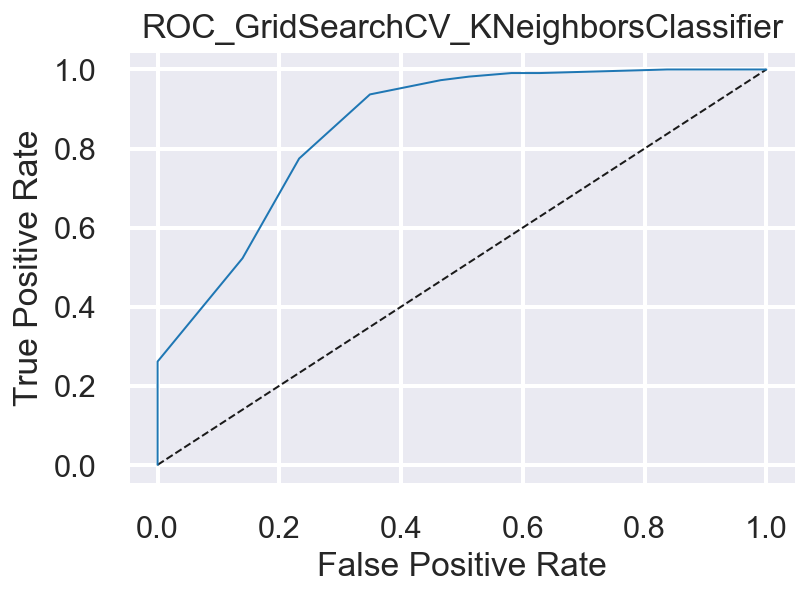

In [54]:
roc_generator(best_model,"GridSearchCV_KNeighborsClassifier")

In [55]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=25)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)
param_dict_2=({'n_estimators':range(2,50)})
from sklearn.model_selection import GridSearchCV
best_model=GridSearchCV(model2,param_dict_2,cv=5)
best_model.fit(X_scaled,y)
best_model.best_params_
best_model.best_score_

C:\Users\satmi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\satmi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7931596091205212

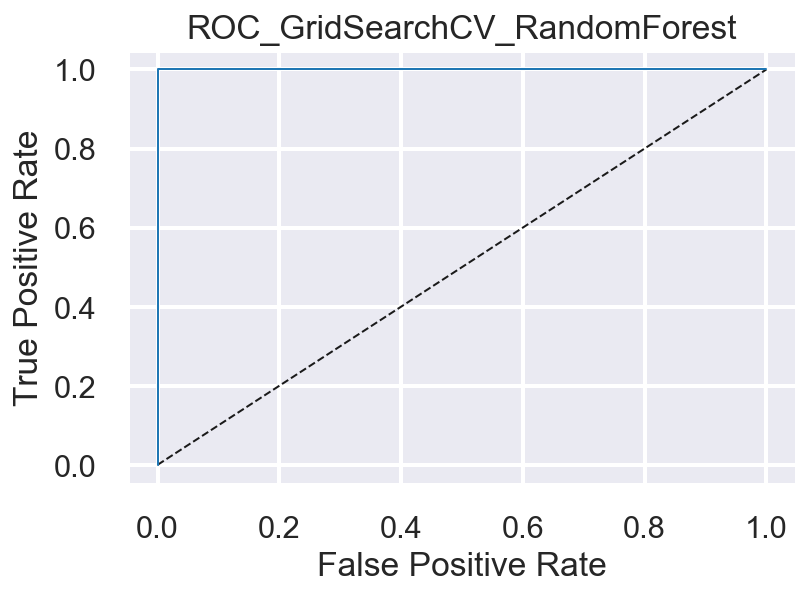

In [56]:
roc_generator(best_model,"GridSearchCV_RandomForest")

In [57]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(n_estimators=20)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)
param_dict_3=({'n_estimators':range(2,50)})
from sklearn.model_selection import GridSearchCV
best_model=GridSearchCV(model3,param_dict_3,cv=5)
best_model.fit(X_scaled,y)
best_model.best_params_
best_model.best_score_

C:\Users\satmi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8045602605863192

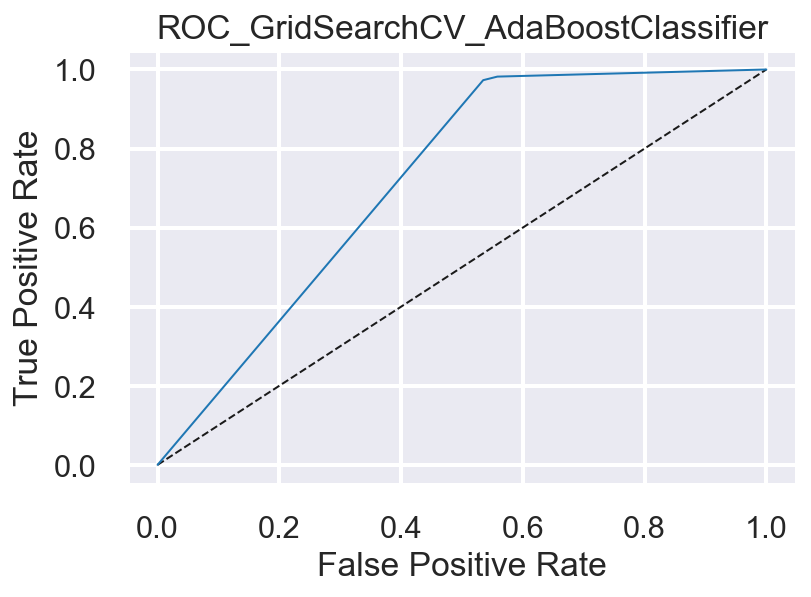

In [58]:
roc_generator(best_model,"GridSearchCV_AdaBoostClassifier")

In [59]:
#Support vector Machine model
from sklearn.svm import SVC
model_svc = SVC(kernel='linear',gamma=0.001,C=1.0)
model_svc.fit(X_train,y_train)
model_svc.score(X_test,y_test)

0.8311688311688312

In [60]:
#Estimating the best model using Cross-validation
new_model=best_model.best_estimator_ #gives the best model estimation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cross_val_score(new_model, X_scaled,y,cv=5).mean()

0.8047065044949763

### Conclusion:

From the results, we can conclude that the results were 79.6% accurate for loan status predictions from Random Forest model using GridSearchCV & ROC curve generated for this model is best among all used models.

#### Results of Machine Learning models:

Logistic regression model: 83.7%

KNeighborsClassifier model: 81.1%

RandomForestClassifier model: 79.3%

AdaBoostClassifier model: 80.4%

Support vector Machine model: 83.1%

KFold cross_val_score: 80.4%